In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber = '101001' # change this number to any binary number you'd like

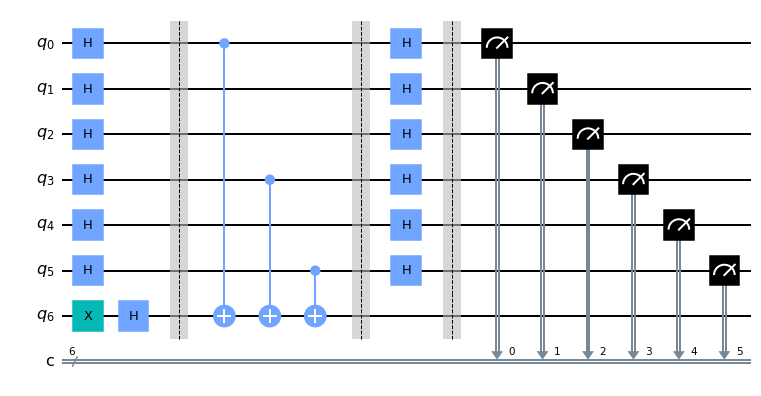

In [3]:
circuit = QuantumCircuit(len(secretnumber)+1, 6)

# Algorithm Part 1
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

# Build the black box which contains the secret number (this is theoretically unknown to us)
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.barrier()

# Algorithm Part 2
circuit.h(range(len(secretnumber)))

circuit.barrier()

circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

circuit.draw(output = 'mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}
